In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from tensorflow.keras.utils import img_to_array , load_img
import numpy as np
from keras import preprocessing

from keras.callbacks import ModelCheckpoint


In [2]:
import zipfile

In [26]:
with zipfile.ZipFile('fruits.zip', 'r') as zip_ref:
    zip_ref.extractall('fruits')

In [91]:
import os
import shutil

source_dir = 'fruits/fruits-360_dataset/fruits-360/Training'
dest_dir = 'fruits/fruits-360_dataset/fruits-360/Training_30_fruits'

# Cria o diretório de destino se ele não existir
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Copia as pastas das 30 primeiras frutas para o diretório de destino
fruits = ['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates']

for fruit in fruits:
    src_path = os.path.join(source_dir, fruit)
    dest_path = os.path.join(dest_dir, fruit)
    shutil.copytree(src_path, dest_path)


In [3]:
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Training_30_fruits',
    batch_size=200,
    color_mode='rgb',
    subset='training',
    target_size=(30, 30))


Found 12018 images belonging to 30 classes.


In [4]:
valid_generator = train_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Training_30_fruits',
    batch_size=200,
    color_mode = 'rgb',
    subset='validation',
    target_size=(30, 30))

Found 2994 images belonging to 30 classes.


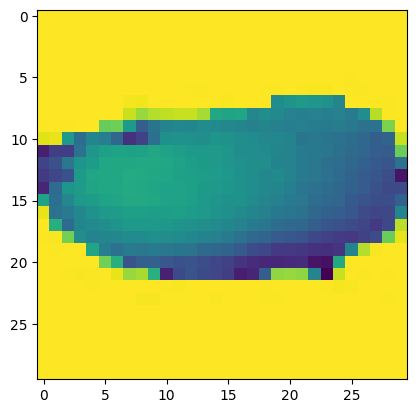

In [5]:
#Visualizando 
x,y = train_generator.next()
for i in range(1):
    image = x[i]   
    plt.imshow(image[:,:,0])
    plt.show()

In [6]:
x.shape

(200, 30, 30, 3)

In [7]:
image.shape

(30, 30, 3)

In [8]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
num_classes = y[0].shape[0]

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


In [10]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(32, (7, 7), input_shape=(30,30,3), activation='relu')) #, data_format='channels_first'
print( model.output_shape)
#Camada de Pooling 	    
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)
	
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(64, (5, 5), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Convolução 2D com função de ativação Rectified Linear Units 128 kernels/Pesos (filtros) 
model.add(Conv2D(128, (3, 3), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Remove 30% dos dados de entrada aleatoriamente 
model.add(Dropout(0.3))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(512, activation='relu'))
print( model.output_shape)
model.add(Dense(128, activation='relu'))
print( model.output_shape)
model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)


(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 2, 2, 128)
(None, 1, 1, 128)
(None, 128)
(None, 512)
(None, 128)
(None, 64)
(None, 30)


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
mcp_save = ModelCheckpoint('model_best.h5', monitor='val_accuracy', mode= 'auto', save_weights_only=True, save_best_only=True, verbose =1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.summary()

model.fit_generator(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10, callbacks=[mcp_save])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        4736      
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 1, 1, 128)        0

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_10476\2336998042.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


60/60 [==============================] - ETA: 0s - loss: 2.4538 - accuracy: 0.3535
Epoch 1: val_accuracy improved from -inf to 0.71786, saving model to model_best.h5
60/60 [==============================] - 44s 736ms/step - loss: 2.4538 - accuracy: 0.3535 - val_loss: 0.9045 - val_accuracy: 0.7179
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.5433 - accuracy: 0.8087
Epoch 2: val_accuracy improved from 0.71786 to 0.83714, saving model to model_best.h5
60/60 [==============================] - 7s 124ms/step - loss: 0.5433 - accuracy: 0.8087 - val_loss: 0.7672 - val_accuracy: 0.8371
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.2550 - accuracy: 0.9087
Epoch 3: val_accuracy improved from 0.83714 to 0.83786, saving model to model_best.h5
60/60 [==============================] - 7s 114ms/step - loss: 0.2550 - accuracy: 0.9087 - val_loss: 0.7689 - val_accuracy: 0.8379
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.1713 - acc

In [15]:
import os
import shutil

source_dir = 'fruits/fruits-360_dataset/fruits-360/Test'
dest_dir = 'fruits/fruits-360_dataset/fruits-360/Test_30_fruits'

# Cria o diretório de destino se ele não existir
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)

# Copia as pastas das 30 primeiras frutas para o diretório de destino
fruits = ['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates']

for fruit in fruits:
    src_path = os.path.join(source_dir, fruit)
    dest_path = os.path.join(dest_dir, fruit)
    shutil.copytree(src_path, dest_path)


In [18]:
test_datagen = preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Test_30_fruits',
    batch_size=1,
    color_mode = 'rgb',    
    target_size=(30, 30))

Found 5035 images belonging to 30 classes.


In [19]:
scores = model.evaluate_generator(test_generator)   
print(scores)

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_10476\1459900303.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


[0.44218289852142334, 0.9195630550384521]


In [20]:
predictions = model.predict_generator(test_generator)
print(predictions)

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_10476\3347971648.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


[[4.0838655e-22 3.0355196e-22 7.9333337e-12 ... 1.5363860e-21
  1.8654100e-06 9.6695248e-06]
 [1.1417748e-22 2.1795126e-17 3.9724178e-16 ... 9.2343848e-09
  6.0326447e-27 8.9425203e-25]
 [7.4875953e-11 1.6048361e-11 9.3393297e-08 ... 6.5711197e-14
  1.0696439e-09 6.5102075e-09]
 ...
 [8.7257780e-32 2.6786192e-31 8.9026767e-22 ... 4.2038620e-32
  5.0761208e-20 2.9918315e-16]
 [9.9648571e-01 2.0900880e-11 1.3134840e-14 ... 1.2690990e-10
  1.1600524e-14 4.5845184e-14]
 [3.3821475e-02 3.0163872e-07 7.2319450e-10 ... 1.7159855e-10
  1.2928503e-10 1.3582740e-11]]


In [21]:
res1 = np.argmax(predictions[0,:])
print(res1) 

8


Como Fazer a predição de uma imagem PNG?

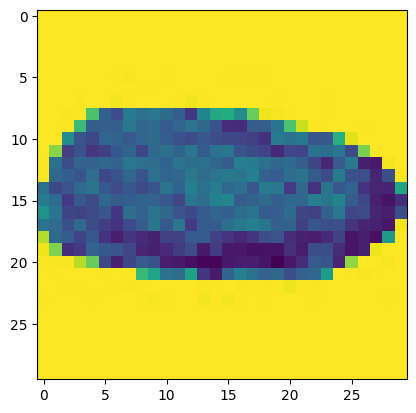

In [38]:
#fileimg = r'D:\digito_7_2SAN.png'
fileimg = r'fruits\fruits-360_dataset\fruits-360\Test_30_fruits\Dates\4_100.jpg'

img = load_img(fileimg , color_mode = "rgb", target_size=(30, 30))

#
x = img_to_array(img)

plt.imshow(x[:,:,0])
plt.show()

In [39]:
x.shape

(30, 30, 3)

In [40]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 30, 30, 3)

In [41]:
y_pred = model.predict(x)

res = np.argmax(y_pred)
print(res)

1/1 [==============================] - 0s 16ms/step
29


In [42]:
y_pred

array([[3.88874653e-35, 1.53647074e-32, 3.50175965e-11, 3.60878706e-21,
        2.51077228e-28, 4.78821909e-22, 9.37211563e-24, 6.73361319e-23,
        3.98034050e-10, 3.06856874e-24, 5.47210500e-26, 2.48381368e-20,
        7.82288345e-10, 2.54714877e-15, 3.82772198e-15, 1.01571349e-10,
        1.10057332e-18, 4.29188962e-28, 4.90933341e-20, 8.39498854e-17,
        7.95068193e-22, 6.46291367e-17, 1.88191220e-18, 3.90747601e-16,
        1.11806643e-19, 8.99918592e-26, 1.00540065e-08, 2.87887989e-27,
        9.37681194e-14, 1.00000000e+00]], dtype=float32)

In [43]:
train_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow 1': 9,
 'Apricot': 10,
 'Avocado': 11,
 'Avocado ripe': 12,
 'Banana': 13,
 'Banana Lady Finger': 14,
 'Banana Red': 15,
 'Cactus fruit': 16,
 'Cantaloupe 1': 17,
 'Cantaloupe 2': 18,
 'Carambula': 19,
 'Cherry 1': 20,
 'Cherry 2': 21,
 'Cherry Rainier': 22,
 'Cherry Wax Black': 23,
 'Cherry Wax Red': 24,
 'Cherry Wax Yellow': 25,
 'Chestnut': 26,
 'Clementine': 27,
 'Cocos': 28,
 'Dates': 29}